In [1]:
# Importando as bibliotecas.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from funcoes_ajuda import descritiva, diagnóstico
import shap
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Dados/houses_to_rent.csv', index_col=0)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            6080 non-null   int64  
 1   area            6080 non-null   int64  
 2   rooms           6080 non-null   int64  
 3   bathroom        6080 non-null   int64  
 4   parking spaces  6080 non-null   int64  
 5   floor           4525 non-null   float64
 6   animal          6080 non-null   object 
 7   furniture       6080 non-null   object 
 8   hoa             5961 non-null   float64
 9   rent amount     6080 non-null   float64
 10  property tax    6080 non-null   float64
 11  fire insurance  6080 non-null   float64
 12  total           6080 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 665.0+ KB


/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


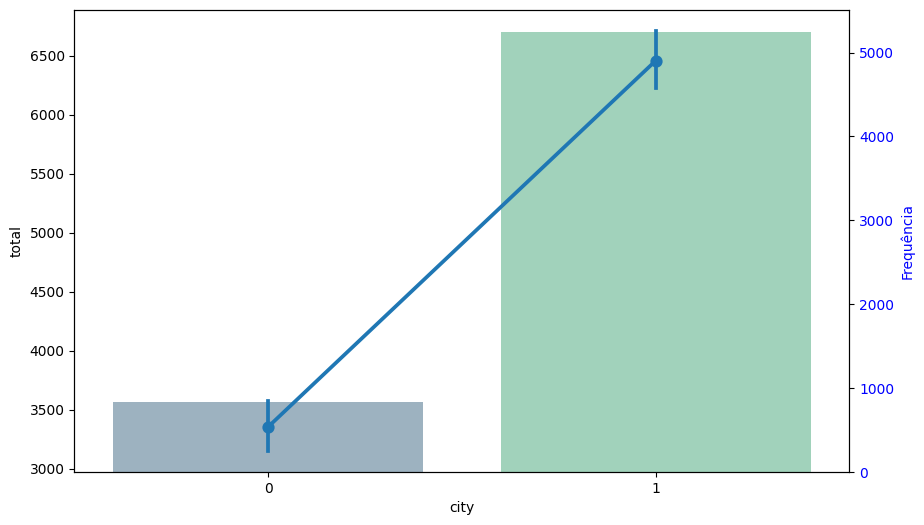

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


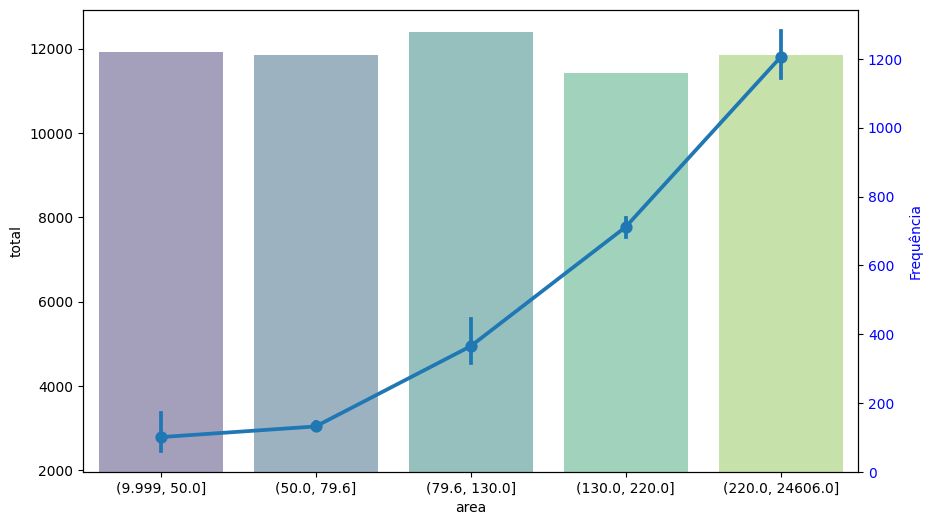

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


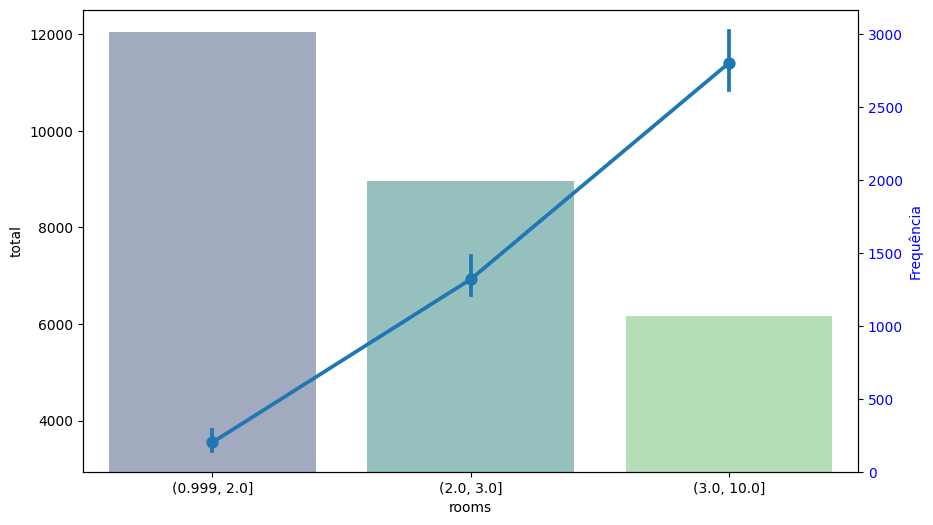

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


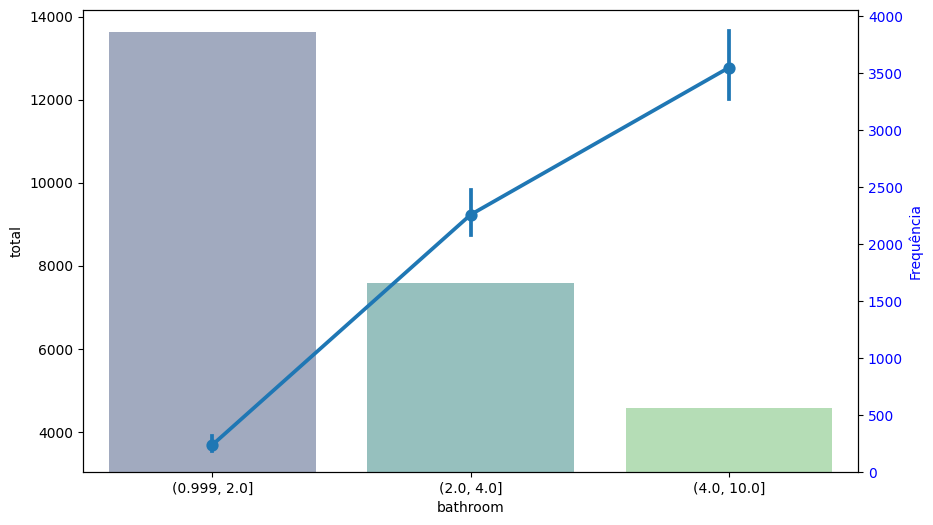

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


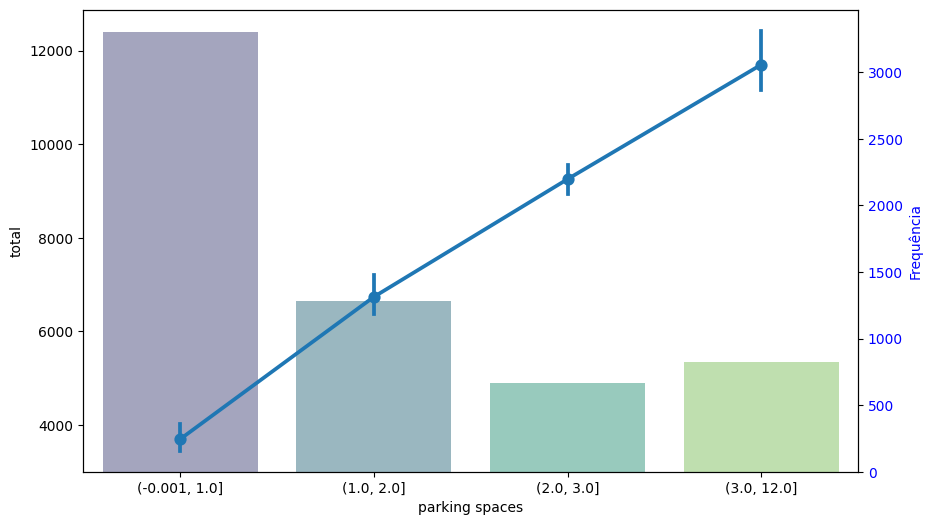

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


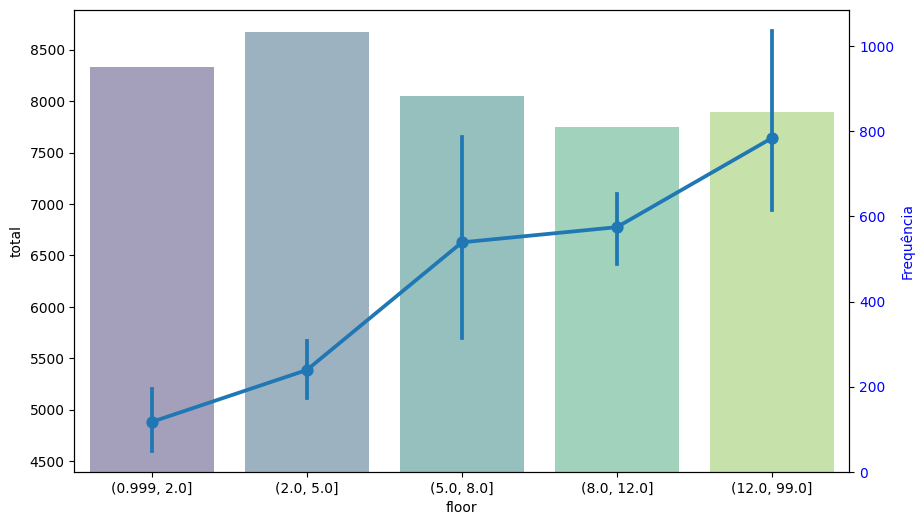

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


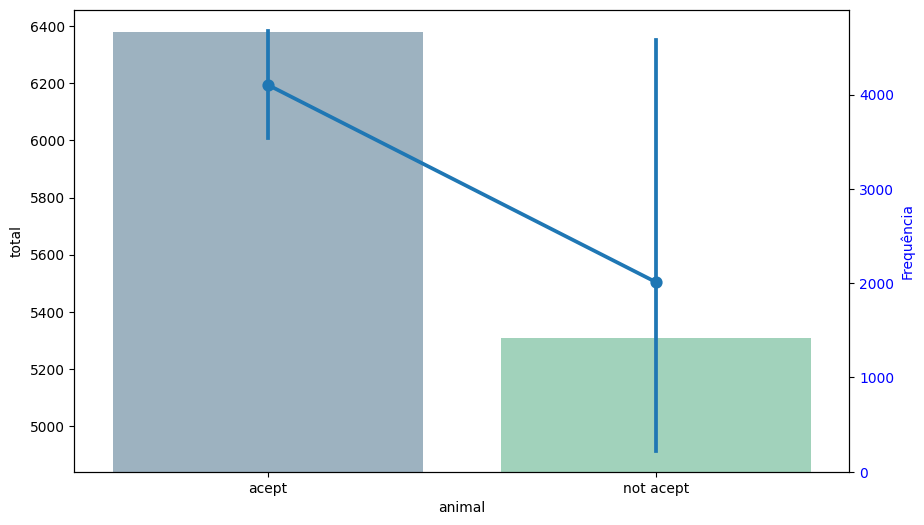

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


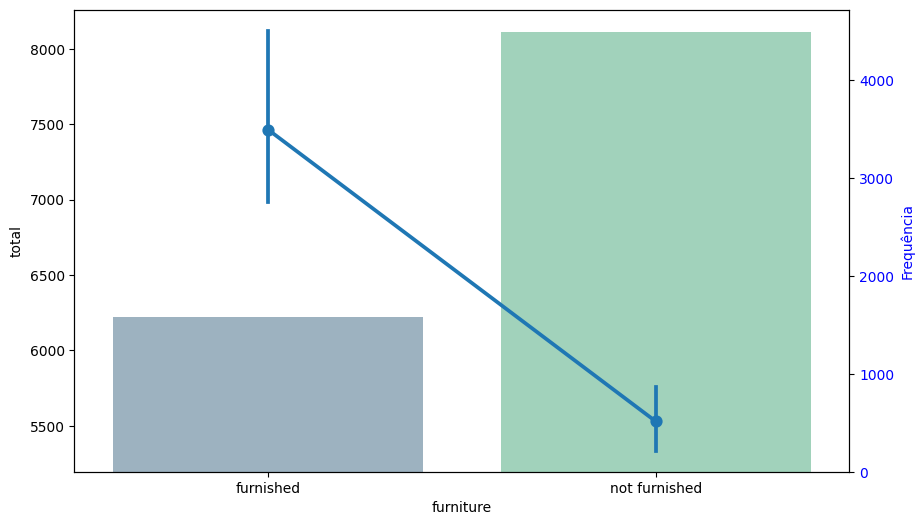

In [8]:
# Gráficos exploratórios.
df['floor'] = df.floor.str.replace('-','NaN').astype('float64')
for var in ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']:
    df[var] = df[var].str.replace('R$','')\
        .str.replace(',','')\
        .str.replace('Sem info','NaN')\
        .str.replace('Incluso','0').astype('float64')
        
df.info()

X_cols = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']
y_col = 'total'

X = pd.get_dummies(df[X_cols], drop_first=True)
y = df[y_col]

for col in X_cols:
    descritiva(df, col, y)


In [10]:
# Tamanhos das bases.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4560, 8)
(4560,)
(1520, 8)
(1520,)


In [12]:
# Instanciando o modelo.
rf = RandomForestRegressor()
rf.fit(X, y)
rf

RandomForestRegressor()

In [14]:
# R2 Score.
r2_score(y_test, rf.predict(X_test))

0.9001544172597268

In [16]:
# Realizando a predição.
df['pred'] = rf.predict(X)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,pred
0,1,240,3,3,4,NaN,acept,furnished,0.0,8000.0,1000.0,121.0,9121.0,7915.780000
1,0,64,2,1,1,10.0,acept,not furnished,540.0,820.0,122.0,11.0,1493.0,1532.600000
2,1,443,5,5,4,3.0,acept,furnished,4172.0,7000.0,1417.0,89.0,12680.0,16950.400000
3,1,73,2,2,1,12.0,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0,2125.780000
4,1,19,1,1,0,NaN,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0,1248.497529


/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


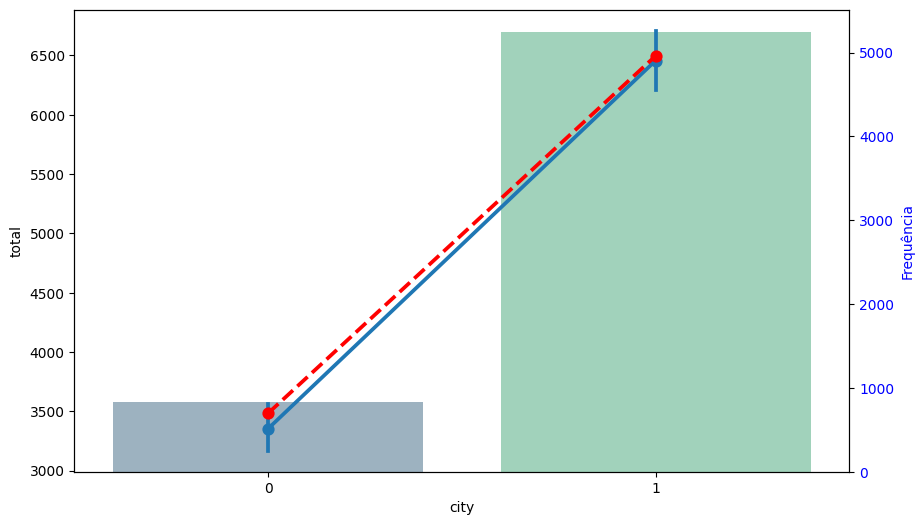

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


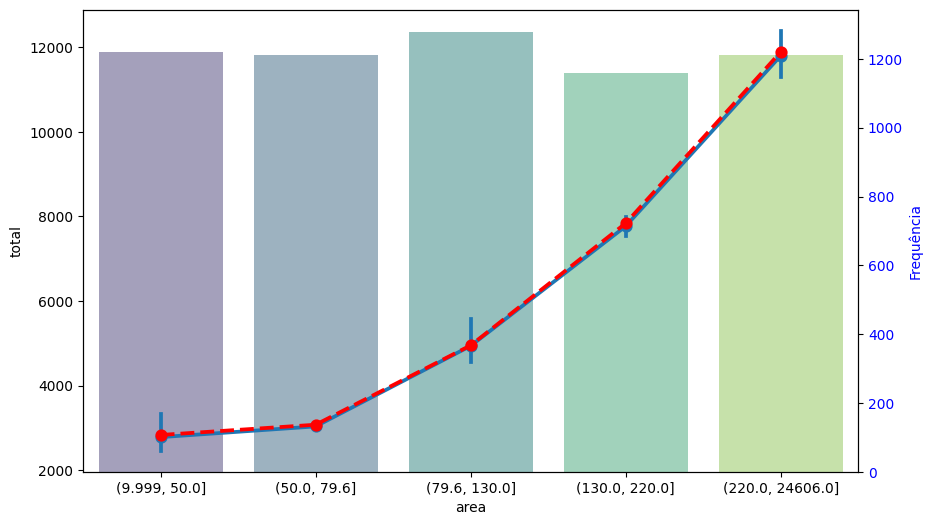

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


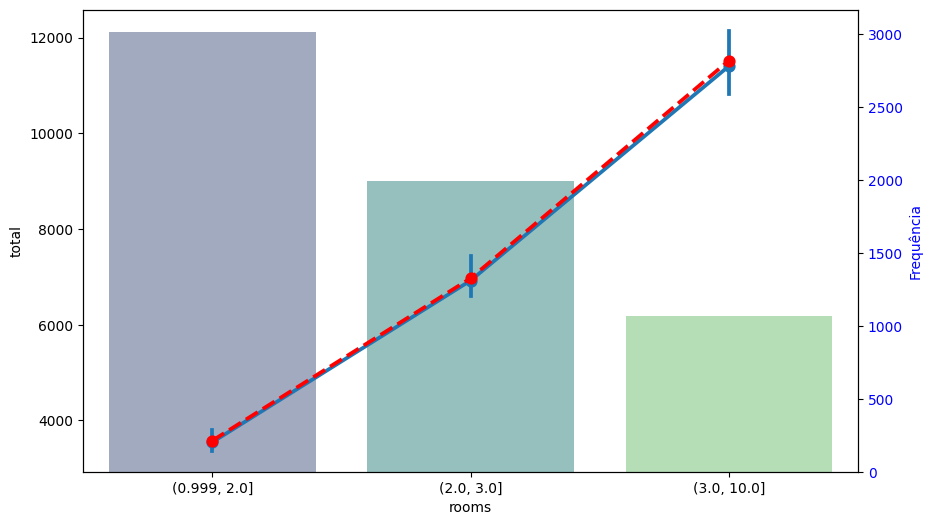

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


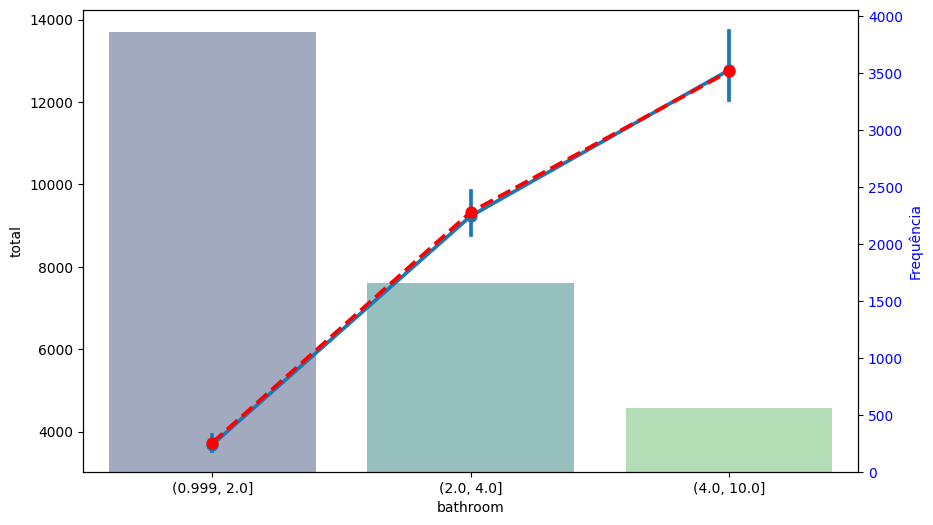

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


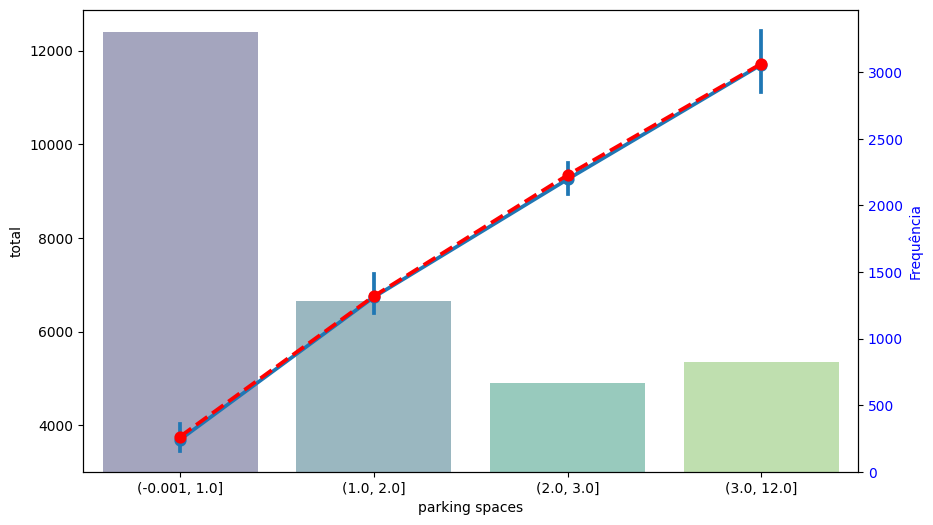

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


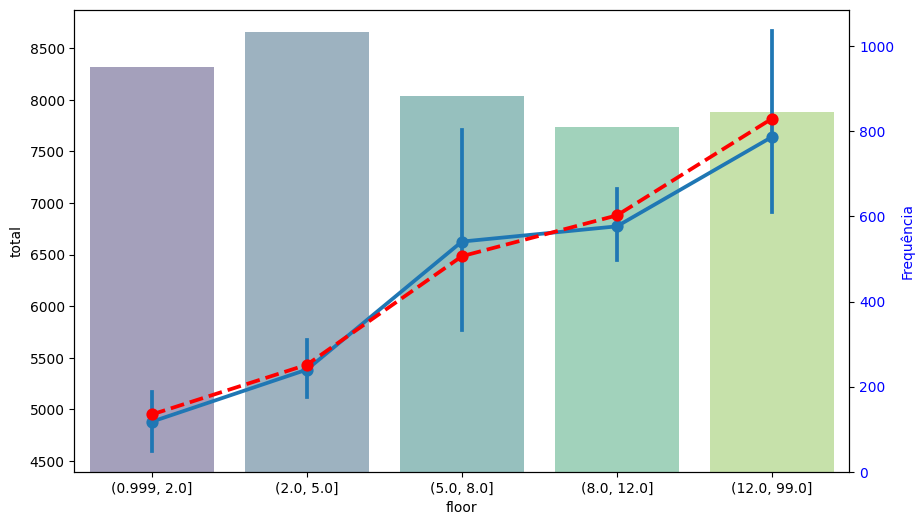

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


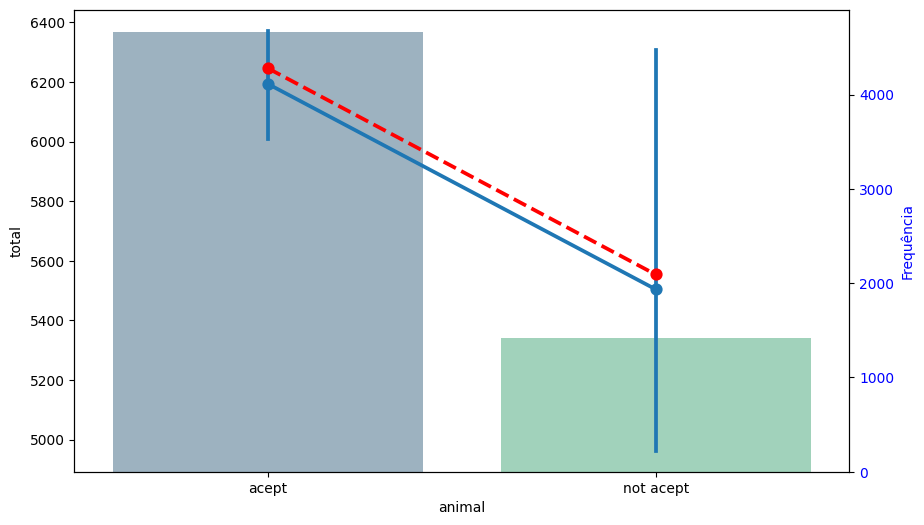

/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:119: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, y=pred, x=var, ax=ax1, color='red', linestyles='--', ci=None)
/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Boosting/funcoes_ajuda.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


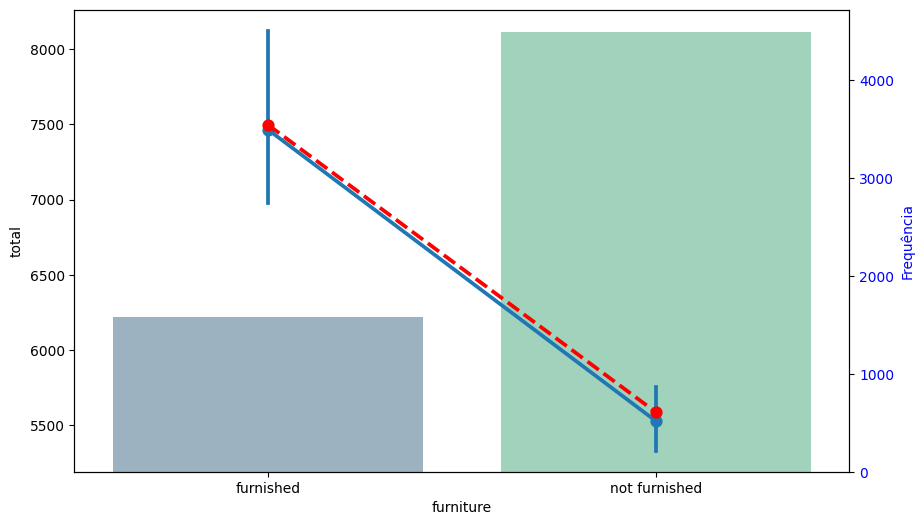

In [17]:
# Vamos rodar uma rotina de diagnóstico por variáveis.

# Esta análise vai mostrar valores esperados vs observados por cada variável.
for col in X_cols:
    diagnóstico(df, col, y, 'pred')

In [18]:
# Calcular os 'shap values'.
amostra = X_test.sample(frac=0.1)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(amostra)

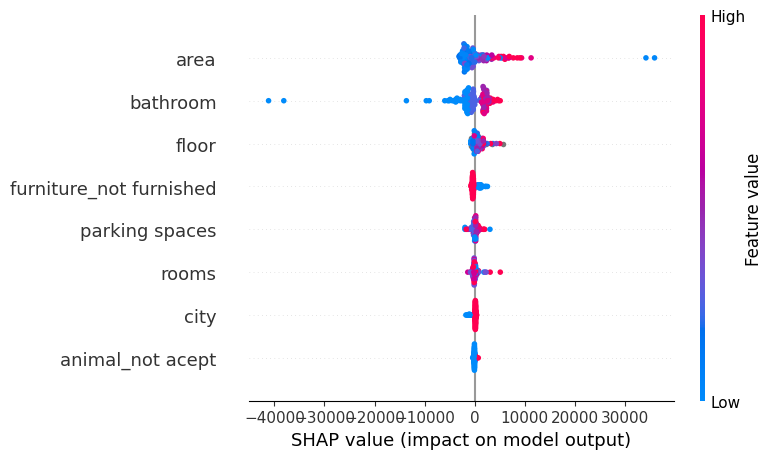

In [19]:
# Gráfico Resumo.
shap.summary_plot(shap_values, amostra, feature_names=X.columns)

<Axes: >

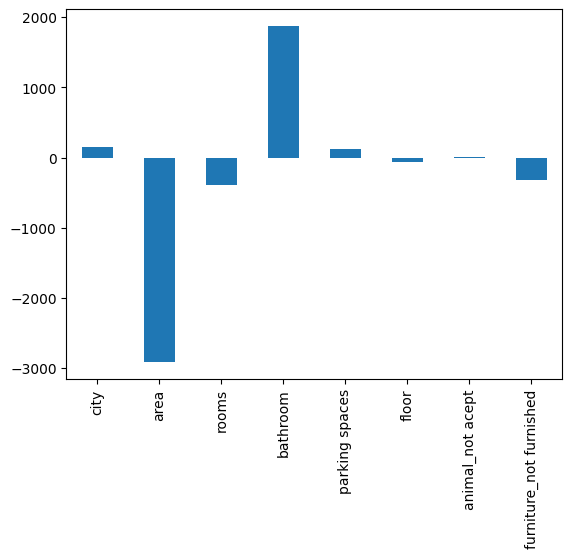

In [20]:
# Fazendo o waterfall 'na mão'.
df_shap = pd.DataFrame(shap_values, columns = X.columns)
df_shap.iloc[0].plot.bar()

In [21]:
# Forceplot.
# Inicializar a visualização.
shap.initjs()

# Explicação no nível de indivíduo (force plot para a primeira amostra de teste).
force_plot = shap.force_plot(explainer.expected_value, 
                shap_values[0], 
                amostra.iloc[0], 
                feature_names=amostra.columns)
plt.show()

# Este não mostra no console, vamos salvar em arquivo.
shap.save_html("force_plot.html", force_plot)